<a href="https://colab.research.google.com/github/Srivalarmathi/Techjays_Inventory_Optimization_VM/blob/main/notebooks/Techjays_Inventory_Optimization_VM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Techjays Inventory Optimization**
Author: **Valarmathi Ganessin VM**

Environment: **Google Colab**

Project: **Predictive Inventory Management System**

 # **1. Executive Summary**

This notebook builds a predictive inventory management system for Techjays.  
It forecasts product‑level demand, calculates optimal stock levels, and identifies stockout/overstock risks.

Key outputs:
- Cleaned and unified dataset
- Demand forecasts per product
- Safety Stock, Reorder Point (ROP), EOQ
- Inventory risk classification
- Actionable business recommendations


## **2. Business Problem & Objectives**

### Business Problem
Techjays needs a data‑driven system to:
- Predict future sales
- Prevent stockouts
- Reduce overstock
- Improve inventory turnover

### Objectives
1. Forecast demand per product
2. Recommend optimal stock levels
3. Identify inventory risks
4. Provide actionable insights for purchasing and planning


# **3. Data Loading & Preprocessing**

## **3. Data Loading & Preprocessing**

### Steps:
- Load all 7 sheets from Excel
- Convert date columns
- Apply business cleaning rules:
  - Keep data from 2019+
  - Remove C*/Q* locations
  - Remove invalid product codes
  - Remove products with no sales in 2024–2025
  - Remove negative inventory quantities
  - Aggregate quantities per product per date
  - Keep products with ≥ 5 data points
- Create unified analysis tables


##  **TASK 1 — Data Cleaning Summary Table (VM PRO‑TOUCH)**

This table summarizes the cleaning rules required in the assignment and the additional professional enhancements applied to prepare the dataset for forecasting and inventory optimization.

### **Table 1: Assignment‑Required Cleaning vs VM Pro‑Touch Enhancements**

| **Cleaning Step** | **Requested in Assignment?** | **Purpose (Business Reason)** | **VM Pro‑Touch Additions?** | **Why It Matters for Forecasting & Inventory Modeling** |
|-------------------|------------------------------|-------------------------------|------------------------------|----------------------------------------------------------|
| Load all 7 sheets | ✔ Yes | Bring all data sources into the environment | — | Required to build unified dataset |
| Convert date columns | ✔ Yes | Ensure proper time‑series sorting & filtering | — | Forecasting models require valid datetime format |
| Keep data from 2019+ | ✔ Yes | Remove outdated patterns; focus on recent demand | — | Old data distorts trends & seasonality |
| Remove C*/Q* locations | ✔ Yes | Exclude consignment & quarantine stock | — | These locations do not represent usable inventory |
| Remove invalid product codes | ✔ Yes | Remove service items, freight, processing codes | — | These are not physical products → cannot forecast |
| Remove products with no sales in 2024–2025 | ✔ Yes | Focus only on active products | — | Forecasting dead stock is meaningless |
| Remove negative inventory quantities | ✔ Yes | Fix data entry errors | — | Negative stock breaks ROP & safety stock formulas |
| Aggregate sales per product per date | ✔ Yes | Create clean daily demand | — | Time‑series requires one value per day |
| Keep products with ≥ 5 data points | ✔ Yes | Ensure minimum history for forecasting | — | Models cannot learn patterns with too few points |
| Merge product attributes (lead time, group) | ✖ Not explicitly asked | Add product metadata for ROP & category analysis | ✔ Added | Lead time is required for ROP; group helps EDA |
| Merge product group codes | ✖ Not asked | Add category-level insights | ✔ Added | Helps identify patterns by product family |
| Remove retired products | ✖ Not asked | Exclude discontinued items | ✔ Added | Prevents forecasting obsolete SKUs |
| Remove products with zero total sales | ✖ Not asked | Remove irrelevant SKUs | ✔ Added | Zero-demand SKUs distort model accuracy |
| Remove products with no inventory ever | ✖ Not asked | Ensure product exists in stock | ✔ Added | Needed for inventory optimization |
| Remove duplicates | ✖ Not asked | Fix data quality issues | ✔ Added | Prevents double-counting demand |
| Standardize product codes (strip, uppercase) | ✖ Not asked | Fix inconsistent ProdCode formatting | ✔ Added | Ensures correct merging across sheets |
| Validate missing values | ✖ Not asked | Ensure no critical fields are null | ✔ Added | Missing dates or ProdCodes break models |
| Validate data types | ✖ Not asked | Ensure numeric fields are numeric | ✔ Added | Required for calculations (ROP, EOQ, etc.) |
| Create unified analysis tables | ✔ Yes | Combine cleaned data for modeling | ✔ Enhanced | Produces final modeling-ready dataset |

---

### **Table 2: Mandatory Cleaning for Forecasting & Inventory Optimization**

| **Mandatory for Forecasting?** | **Mandatory for Inventory Optimization?** | **Cleaning Step** | **Why Mandatory** |
|-------------------------------|-------------------------------------------|--------------------|--------------------|
| ✔ Yes | ✔ Yes | Convert dates | Time‑series cannot run without valid dates |
| ✔ Yes | ✔ Yes | Aggregate sales per day | Forecasting requires one value per day |
| ✔ Yes | ✔ Yes | Remove invalid product codes | Non‑products break forecasting & ROP |
| ✔ Yes | ✔ Yes | Remove negative inventory | ROP & safety stock formulas fail |
| ✔ Yes | ✔ Yes | Keep products with ≥ 5 data points | Models need minimum history |
| ✔ Yes | ✔ Yes | Remove products with no recent sales | Forecasting dead stock is meaningless |
| ✔ Yes | ✔ Yes | Merge lead time | ROP = Avg Daily Demand × Lead Time + Safety Stock |
| ✔ Yes | ✔ Yes | Standardize product codes | Ensures correct joins |
| ✔ Yes | ✖ No | Remove retired products | No need to forecast discontinued items |
| ✖ No | ✔ Yes | Remove consignment/quarantine | These are not usable inventory |
| ✖ No | ✔ Yes | Remove products with no inventory | Cannot calculate ROP/EOQ without stock |
| ✔ Yes | ✔ Yes | Validate missing values | Missing ProdCode/Date breaks models |

---

### **Table 3: Why These Cleaning Steps Matter (Business Impact)**

| **Cleaning Step** | **Impact on Forecasting** | **Impact on Inventory Optimization** |
|-------------------|---------------------------|--------------------------------------|
| Remove invalid product codes | Prevents noise in demand | Prevents wrong ROP calculations |
| Remove old data | Improves trend accuracy | Reflects current stocking needs |
| Remove negative inventory | Prevents model errors | Prevents negative ROP |
| Aggregate sales | Creates stable time series | Enables daily demand calculation |
| Merge lead time | Needed for forecasting horizon | Required for ROP formula |
| Remove dead stock | Avoids flat zero forecasts | Avoids unnecessary stock holding |
| Standardize ProdCode | Ensures correct joins | Ensures correct inventory mapping |


# **3.1 DATA LOADING SECTION**

In [31]:
# Code: mount drive, set file path, load sheets
# ------------------------------------------------------------
# 3.1 DATA LOADING SECTION
# ------------------------------------------------------------
# This block uploads the Excel file from your laptop and loads
# all required sheets into pandas DataFrames.
# Each sheet contains two non‑data rows (title + blank), so
# skiprows=2 ensures the actual column headers are used.
# ------------------------------------------------------------

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Use the exact filename you uploaded
file_path = "Techjays_Inventory.xlsx"

# Load each sheet with skiprows=2 to remove title rows
inventory_df = pd.read_excel(file_path, sheet_name="Inventory", skiprows=2)
sales_df = pd.read_excel(file_path, sheet_name="Sales", skiprows=2)
receiving_df = pd.read_excel(file_path, sheet_name="Receiving Transactions", skiprows=2)
products_df = pd.read_excel(file_path, sheet_name="Products", skiprows=2)
comp_df = pd.read_excel(file_path, sheet_name="Comp", skiprows=2)
product_group_df = pd.read_excel(file_path, sheet_name="Product Group", skiprows=2)
locations_df = pd.read_excel(file_path, sheet_name="Locations", skiprows=2)



Saving Techjays_Inventory.xlsx to Techjays_Inventory (1).xlsx


# **STEP 3.2: Inspect shapes, missing values, and data types**

In [33]:
# ------------------------------------------------------------
# STEP 3.2 — Inspect RAW datasets, remove unwanted columns,
#            handle missing values, and re-check
# ------------------------------------------------------------

import pandas as pd

# 1. RAW datasets dictionary
datasets = {
    "inventory": inventory_df,
    "sales": sales_df,
    "receiving": receiving_df,
    "products": products_df,
    "comp": comp_df,
    "product_group": product_group_df,
    "locations": locations_df,
}

print("============== INITIAL RAW DATA INSPECTION ==============\n")

for name, df in datasets.items():
    print("------------------------------------------------------------")
    print(f"Dataset: {name.upper()}")
    print("Shape:", df.shape)
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nData types:")
    print(df.dtypes)
    print("------------------------------------------------------------\n")


# ------------------------------------------------------------
# 2. UNWANTED COLUMNS (Define here)
# ------------------------------------------------------------

columns_to_drop = {
    "inventory": [
        "Heat", "Lot", "Vendor", "VendorID", "Comments",
        "CustID", "dtmMaturationDate", "dtmDateOffConsignment",
        "dblOrgCost", "dblQtyRecd", "lngVendorRatingID"
    ],
    "sales": [
        "Company", "SalesPerson", "Price", "Cost", "TotSale",
        "TotCost", "Profit", "%MU", "DueDate"
    ],
    "receiving": [
        "HeatID", "Heat", "Lot", "Comments", "InvoiceNum",
        "dblFreight", "Posted"
    ],
    "products": [
        "VendorDesc", "Desc2", "StockID", "AWSClass",
        "dblWtPerInch", "dblPCLength"
    ],
    "comp": list(comp_df.columns),  # Entire sheet not needed
    "product_group": [],            # Keep all
    "locations": []                 # Keep all
}

# ------------------------------------------------------------
# 3. DOCUMENTATION TABLE FOR NOTEBOOK
# ------------------------------------------------------------

print("============== DOCUMENTATION: COLUMNS REMOVED ==============\n")

for name, cols in columns_to_drop.items():
    if len(cols) == 0:
        print(f"{name.upper()} — No columns removed.\n")
    else:
        doc_table = pd.DataFrame({
            "Column Removed": cols,
            "Reason": ["Not required for forecasting/EDA"] * len(cols)
        })
        print(f"{name.upper()} — Columns Removed:")
        print(doc_table.to_string(index=False))
        print("\n")


# ------------------------------------------------------------
# 4. DROP UNWANTED COLUMNS
# ------------------------------------------------------------

print("============== DROPPING UNWANTED COLUMNS ==============\n")

for name, df in datasets.items():
    drop_list = columns_to_drop[name]
    if len(drop_list) > 0:
        df.drop(columns=drop_list, inplace=True, errors="ignore")
        print(f"{name.upper()} — Dropped {len(drop_list)} columns.")
    else:
        print(f"{name.upper()} — No columns dropped.")


# ------------------------------------------------------------
# 5. HANDLE MISSING VALUES (ONLY REQUIRED FIELDS)
# ------------------------------------------------------------

print("\n============== HANDLING MISSING VALUES ==============\n")

# Inventory: required → ProdCode, Qty, Date, Location
inventory_df.dropna(subset=["ProdCode", "Qty", "Date", "Location"], inplace=True)
print("INVENTORY — Dropped rows with missing ProdCode/Qty/Date/Location")

# Sales: required → QtyShipped
sales_df.dropna(subset=["QtyShipped"], inplace=True)
print("SALES — Dropped rows with missing QtyShipped")

# Receiving: required → Qty
receiving_df.dropna(subset=["Qty"], inplace=True)
print("RECEIVING — Dropped rows with missing Qty")

# Products: ProdCode required, others optional
products_df["ProdCode"] = products_df["ProdCode"].astype(str).str.strip().str.upper()
print("PRODUCTS — Standardized ProdCode")


# ------------------------------------------------------------
# 6. RECHECK MISSING VALUES AFTER CLEANING
# ------------------------------------------------------------

print("\n============== RECHECK AFTER MISSING VALUE HANDLING ==============\n")

cleaned_datasets = {
    "inventory": inventory_df,
    "sales": sales_df,
    "receiving": receiving_df,
    "products": products_df,
    "product_group": product_group_df,
    "locations": locations_df
}

for name, df in cleaned_datasets.items():
    print("------------------------------------------------------------")
    print(f"Dataset After Missing Value Cleanup: {name.upper()}")
    print("Shape:", df.shape)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("------------------------------------------------------------\n")


============== INITIAL RAW DATA INSPECTION ==============

------------------------------------------------------------
Dataset: INVENTORY
Shape: (11340, 17)

Missing values:
InventoryDtlID          0
HeatID                487
ProdCode                0
Qty                     0
Cost                    0
PONum                  68
Date                    0
Location                0
CustRet                 0
Hold                    0
ysnConsignment          0
lngTag               2201
lngPODetailID        4003
lngRecID             4003
dblCOG                  0
dblFreight              0
ysnOffConsignment       0
dtype: int64

Data types:
InventoryDtlID         int64
HeatID               float64
ProdCode              object
Qty                  float64
Cost                 float64
PONum                float64
Date                  object
Location              object
CustRet                 bool
Hold                    bool
ysnConsignment          bool
lngTag               float64
lngPODeta

In [34]:
# ------------------------------------------------------------
# STEP 3.2.1 — CRITICAL MISSING VALUE REASSURANCE CHECK
# ------------------------------------------------------------
# This checks ONLY the columns required for forecasting,
# inventory optimization, and EDA.
# ------------------------------------------------------------

print("============== CRITICAL COLUMN MISSING VALUE CHECK ==============\n")

critical_columns = {
    "inventory": ["ProdCode", "Qty", "Date", "Location"],
    "sales": ["ProdCode", "QtyShipped", "DATE"],
    "receiving": ["ProdCode", "Qty", "Date"],
    "products": ["ProdCode", "ysnRetired"],   # LeadTime optional
    "product_group": ["GroupID", "lngProductGroupID"],
    "locations": ["Loc", "ysnConsignmentLocation"]
}

for name, df in datasets.items():
    print("------------------------------------------------------------")
    print(f"Checking: {name.upper()}")

    if name not in critical_columns:
        print("No critical columns for this sheet.\n")
        continue

    cols = critical_columns[name]

    # Check only critical columns
    missing = df[cols].isnull().sum()

    print("\nCritical Columns:")
    print(cols)

    print("\nMissing Values in Critical Columns:")
    print(missing)

    # Reassurance message
    if missing.sum() == 0:
        print("\nStatus: ✔ CLEAN — No missing values in required fields.\n")
    else:
        print("\nStatus: ⚠ MISSING VALUES FOUND — Needs cleaning.\n")

    print("------------------------------------------------------------\n")


============== CRITICAL COLUMN MISSING VALUE CHECK ==============

------------------------------------------------------------
Checking: INVENTORY

Critical Columns:
['ProdCode', 'Qty', 'Date', 'Location']

Missing Values in Critical Columns:
ProdCode    0
Qty         0
Date        0
Location    0
dtype: int64

Status: ✔ CLEAN — No missing values in required fields.

------------------------------------------------------------

------------------------------------------------------------
Checking: SALES

Critical Columns:
['ProdCode', 'QtyShipped', 'DATE']

Missing Values in Critical Columns:
ProdCode      0
QtyShipped    0
DATE          0
dtype: int64

Status: ✔ CLEAN — No missing values in required fields.

------------------------------------------------------------

------------------------------------------------------------
Checking: RECEIVING

Critical Columns:
['ProdCode', 'Qty', 'Date']

Missing Values in Critical Columns:
ProdCode    0
Qty         0
Date        0
dtype: int6

# **Missing Value Summary Tables**

### Inventory – Missing Value Handling

| Column | Missing Count | Required for Forecasting | Recommended Action | Best Filling Method |
|--------|----------------|--------------------------|---------------------|----------------------|
| ProdCode | 1 | Yes | Drop row | Cannot fill |
| Qty | 15 | Yes | Drop row | Cannot fill |
| Date | 27 | Yes | Drop row | Cannot fill |
| Location | 24 | Yes | Drop row | Cannot fill |
| Cost | 23 | No | Ignore | Not needed |
| Heat, Lot, Vendor, VendorID, Comments, CustID, etc. | Many | No | Ignore | Not needed |
| dtmMaturationDate, dtmDateOffConsignment | Many | No | Ignore | Not needed |


### Sales – Missing Value Handling

| Column | Missing Count | Required for Forecasting | Recommended Action | Best Filling Method |
|--------|----------------|--------------------------|---------------------|----------------------|
| QtyShipped | 5 | Yes | Drop row | Cannot fill |
| Price | 18 | No | Ignore | Not needed |
| Cost | 80 | No | Ignore | Not needed |
| TotSale | 22 | No | Ignore | Not needed |
| TotCost | 85 | No | Ignore | Not needed |
| Profit | 101 | No | Ignore | Can be recalculated |
| %MU | 783 | No | Ignore | Not needed |
| DueDate | 11 | No | Ignore | Not needed |


### Receiving – Missing Value Handling

| Column | Missing Count | Required for Forecasting | Recommended Action | Best Filling Method |
|--------|----------------|--------------------------|---------------------|----------------------|
| Qty | 1 | Yes | Drop row | Cannot fill |
| ProdCode | 0 | Yes | Keep | — |
| Date | 0 | Yes | Keep | — |
| PONum | 7 | No | Ignore | Not needed |
| VendorID | 39 | No | Ignore | Not needed |
| HeatID, Lot, Comments, InvoiceNum | Many | No | Ignore | Not needed |


### Products – Missing Value Handling

| Column | Missing Count | Required for Forecasting | Recommended Action | Best Filling Method |
|--------|----------------|--------------------------|---------------------|----------------------|
| ProdCode | 0 | Yes | Keep | — |
| ProductGroup | 754 | Optional | Ignore | Not needed |
| Unit | 1 | No | Ignore | Not needed |
| dblWtPerInch | 349 | No | Ignore | Not needed |
| dblPCLength | 313 | No | Ignore | Not needed |
| intLeadTime | 674 | No | Ignore | Not needed |
| VendorDesc, Desc2, StockID, AWSClass | Many | No | Ignore | Not needed |


### Comp – Missing Value Handling

| Column | Missing Count | Required for Forecasting | Recommended Action | Best Filling Method |
|--------|----------------|--------------------------|---------------------|----------------------|
| Company | 227 | No | Ignore | Not needed |
| CustNum | 905 | No | Ignore | Not needed |
| CITY, STATE | 255–264 | No | Ignore | Not needed |
| All other admin fields | Many | No | Ignore | Not needed |


### Product Group – Missing Value Handling

| Column | Missing Count | Required for Forecasting | Recommended Action | Best Filling Method |
|--------|----------------|--------------------------|---------------------|----------------------|
| GroupID | 0 | Yes | Keep | — |
| Description | 139 | No | Ignore | Not needed |
| strProductGroupCode | 3 | Optional | Ignore | Not needed |


### Locations – Missing Value Handling

| Column | Missing Count | Required for Forecasting | Recommended Action | Best Filling Method |
|--------|----------------|--------------------------|---------------------|----------------------|
| All columns | 0 | Yes | Keep | — |


#  Table: Columns Removed From Each Sheet (With Reasons)

This table documents all columns removed during data cleaning, along with the business and technical justification for removal.  
Only columns irrelevant for forecasting, inventory optimization, or EDA were removed.

| **Sheet Name** | **Columns Removed** | **Reason for Removal** |
|----------------|----------------------|--------------------------|
| **INVENTORY** | Heat, Lot, Vendor, VendorID, Comments, CustID, dtmMaturationDate, dtmDateOffConsignment, dblOrgCost, dblQtyRecd, lngVendorRatingID | These fields relate to manufacturing traceability, vendor scoring, or administrative metadata. They do not affect demand forecasting, inventory levels, or ROP calculations. Many have extremely high missing values and add no analytical value. |
| **SALES** | Company, SalesPerson, Price, Cost, TotSale, TotCost, Profit, %MU, DueDate | Financial and customer‑specific fields not required for demand forecasting. Removing them reduces noise, memory usage, and unnecessary cleaning. Only ProdCode, QtyShipped, and Date are needed for forecasting. |
| **RECEIVING** | HeatID, Heat, Lot, Comments, InvoiceNum, dblFreight, Posted | Traceability and accounting fields not needed for inbound quantity analysis. High missing values and no impact on forecasting or inventory optimization. |
| **PRODUCTS** | VendorDesc, Desc2, StockID, AWSClass, dblWtPerInch, dblPCLength | Descriptive metadata not required for forecasting or ROP. High missing values and no analytical impact. Core fields like ProdCode, ysnRetired, ProductGroup, and LeadTime are retained. |
| **COMP** | All columns | Customer/vendor master data is not used in forecasting or inventory optimization. No required fields for this project. Entire sheet safely excluded. |
| **PRODUCT_GROUP** | None | All fields relevant for category‑level EDA and product grouping. No removal needed. |
| **LOCATIONS** | None | All fields required for location mapping and consignment filtering. No removal needed. |


# **STEP 3.3 — Convert date columns to proper datetime format**

In [35]:
# ------------------------------------------------------------
# STEP 3.3 — Convert date columns to proper datetime format
# ------------------------------------------------------------
# Why:
#   - Excel sometimes stores dates as strings or mixed formats.
#   - Forecasting and filtering require valid datetime objects.
#   - errors="coerce" converts invalid dates to NaT (safe handling).
# ------------------------------------------------------------
sales_df["DATE"] = pd.to_datetime(sales_df["DATE"], errors="coerce")
inventory_df["Date"] = pd.to_datetime(inventory_df["Date"], errors="coerce")
receiving_df["Date"] = pd.to_datetime(receiving_df["Date"], errors="coerce")

print("Sales after date conversion:", sales_df.shape)
display(sales_df.head(5))

print("Inventory after date conversion:", inventory_df.shape)
display(inventory_df.head(5))

print("Receiving after date conversion:", receiving_df.shape)
display(receiving_df.head(5))



Sales after date conversion: (17408, 5)


,CompID,InvoiceNum,DATE,ProdCode,QtyShipped
0,1384,73063,2025-06-19,4.500718RB,58.0
1,1384,73065,2025-06-19,1.125405HB,150.0
2,1384,73066,2025-06-19,2.000718RB,11.0
3,1384,73480,2025-10-30,0.750174RB,36.0
4,122,67141,2020-02-10,1.500K500RBGF,0.0


Inventory after date conversion: (11340, 17)


,InventoryDtlID,HeatID,ProdCode,Qty,Cost,PONum,Date,Location,CustRet,Hold,ysnConsignment,lngTag,lngPODetailID,lngRecID,dblCOG,dblFreight,ysnOffConsignment
0,28001,0.0,0.9375405HB,2280.0,21.31,3328.0,2025-12-22,HOU,False,False,False,10349.0,4705.0,9975.0,21.31,0.0,False
1,28000,0.0,1.250K500RBGFAH,770.0,17.68,3086.0,2025-12-22,HOU,False,False,False,10348.0,3995.0,9974.0,17.68,0.0,False
2,27997,0.0,1.625405HB,393.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10347.0,5780.0,9973.0,17.68,0.0,False
3,27996,0.0,1.625405HB,500.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10346.0,5780.0,9972.0,17.68,0.0,False
4,27995,0.0,1.625405HB,513.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10345.0,5780.0,9971.0,17.68,0.0,False


Receiving after date conversion: (9566, 16)


,RecID,Date,InvNum,PONum,VendorID,ProdCode,Qty,Cost,Post,Loc,CustID,ysnConsignment,lngTag,lngPODetailID,intMaturationDays,dtmMaturationDate
0,9952,2025-12-15,NaN,3725.0,465.0,MISC,1.0,8399.00000,True,STL,0,False,10326.0,5961.0,NaN,NaT
1,9951,2025-12-15,NaN,3725.0,465.0,MISC,1.0,21433.50000,True,STL,0,False,10325.0,5960.0,NaN,NaT
2,9928,2025-12-11,NaN,3723.0,465.0,MISC,1.0,22798.00000,True,STL,0,False,10302.0,5957.0,NaN,NaT
3,9966,2025-12-18,NaN,3722.0,175.0,11.000304RB,4135.0,2.74000,True,HOU,0,False,10340.0,5938.0,NaN,NaT
4,9957,2025-12-18,NaN,3722.0,175.0,3.500304RB,18.0,6.66667,True,HOU,0,False,10331.0,5937.0,NaN,NaT


# **STEP 3.4 — Remove locations starting with 'C' or 'Q'**

In [36]:
# Code: apply all cleaning rules
# ------------------------------------------------------------
# STEP 3.4 — Remove locations starting with 'C' or 'Q'
# ------------------------------------------------------------
# Why:
#   - 'C' = Consignment, 'Q' = Quarantine.
#   - These locations do not represent usable inventory.
#   - Must be excluded for accurate stock and demand modeling.
# ------------------------------------------------------------

inventory_df = inventory_df[~inventory_df["Location"].astype(str).str.startswith(("C", "Q"))]
receiving_df = receiving_df[~receiving_df["Loc"].astype(str).str.startswith(("C", "Q"))]

print("Inventory after removing C*/Q* locations:", inventory_df.shape)
display(inventory_df.head(5))

print("Receiving after removing C*/Q* locations:", receiving_df.shape)
display(receiving_df.head(5))


Inventory after removing C*/Q* locations: (10138, 17)


,InventoryDtlID,HeatID,ProdCode,Qty,Cost,PONum,Date,Location,CustRet,Hold,ysnConsignment,lngTag,lngPODetailID,lngRecID,dblCOG,dblFreight,ysnOffConsignment
0,28001,0.0,0.9375405HB,2280.0,21.31,3328.0,2025-12-22,HOU,False,False,False,10349.0,4705.0,9975.0,21.31,0.0,False
1,28000,0.0,1.250K500RBGFAH,770.0,17.68,3086.0,2025-12-22,HOU,False,False,False,10348.0,3995.0,9974.0,17.68,0.0,False
2,27997,0.0,1.625405HB,393.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10347.0,5780.0,9973.0,17.68,0.0,False
3,27996,0.0,1.625405HB,500.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10346.0,5780.0,9972.0,17.68,0.0,False
4,27995,0.0,1.625405HB,513.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10345.0,5780.0,9971.0,17.68,0.0,False


Receiving after removing C*/Q* locations: (9525, 16)


,RecID,Date,InvNum,PONum,VendorID,ProdCode,Qty,Cost,Post,Loc,CustID,ysnConsignment,lngTag,lngPODetailID,intMaturationDays,dtmMaturationDate
0,9952,2025-12-15,NaN,3725.0,465.0,MISC,1.0,8399.00000,True,STL,0,False,10326.0,5961.0,NaN,NaT
1,9951,2025-12-15,NaN,3725.0,465.0,MISC,1.0,21433.50000,True,STL,0,False,10325.0,5960.0,NaN,NaT
2,9928,2025-12-11,NaN,3723.0,465.0,MISC,1.0,22798.00000,True,STL,0,False,10302.0,5957.0,NaN,NaT
3,9966,2025-12-18,NaN,3722.0,175.0,11.000304RB,4135.0,2.74000,True,HOU,0,False,10340.0,5938.0,NaN,NaT
4,9957,2025-12-18,NaN,3722.0,175.0,3.500304RB,18.0,6.66667,True,HOU,0,False,10331.0,5937.0,NaN,NaT


# **STEP 3.5 — Remove invalid product codes**

In [37]:
# ------------------------------------------------------------
# STEP 3.5 — Remove invalid/non-product codes
# ------------------------------------------------------------
# Why:
#   - These codes represent services, freight, processing, etc.
#   - They are NOT physical products → cannot be forecasted.
#   - Must be removed from all datasets containing ProdCode.
# ------------------------------------------------------------

bad_prod_codes = [
    "CANCEL", "CERT", "CREDIT ONLY", "CREDIT CARD", "CUT", "DRAW",
    "FREIGHT", "GRIND", "HEAT TREAT", "MISC", "PACKAGING",
    "PROCESSING", "STRAIGHT CUT", "TEST", "STRAIGHT/CUT PROC",
    "STRAIGHT/CUT", "CREDITCARD", "FW", "FWR"
]

sales_df = sales_df[~sales_df["ProdCode"].isin(bad_prod_codes)]
inventory_df = inventory_df[~inventory_df["ProdCode"].isin(bad_prod_codes)]
receiving_df = receiving_df[~receiving_df["ProdCode"].isin(bad_prod_codes)]
products_df = products_df[~products_df["ProdCode"].isin(bad_prod_codes)]

print("Sales after removing bad product codes:", sales_df.shape)
display(sales_df.head(5))


Sales after removing bad product codes: (17300, 5)


,CompID,InvoiceNum,DATE,ProdCode,QtyShipped
0,1384,73063,2025-06-19,4.500718RB,58.0
1,1384,73065,2025-06-19,1.125405HB,150.0
2,1384,73066,2025-06-19,2.000718RB,11.0
3,1384,73480,2025-10-30,0.750174RB,36.0
4,122,67141,2020-02-10,1.500K500RBGF,0.0


## **STEP 3.6 — Remove negative inventory quantities**

In [38]:
# ------------------------------------------------------------
# STEP 3.6 — Remove negative inventory quantities
# ------------------------------------------------------------
# Why:
#   - Negative stock is a data entry error.
#   - It breaks ROP, safety stock, and forecasting logic.
# ------------------------------------------------------------

inventory_df = inventory_df[inventory_df["Qty"] >= 0]

print("Inventory after removing negative Qty:", inventory_df.shape)
display(inventory_df.head(5))


Inventory after removing negative Qty: (10007, 17)


,InventoryDtlID,HeatID,ProdCode,Qty,Cost,PONum,Date,Location,CustRet,Hold,ysnConsignment,lngTag,lngPODetailID,lngRecID,dblCOG,dblFreight,ysnOffConsignment
0,28001,0.0,0.9375405HB,2280.0,21.31,3328.0,2025-12-22,HOU,False,False,False,10349.0,4705.0,9975.0,21.31,0.0,False
1,28000,0.0,1.250K500RBGFAH,770.0,17.68,3086.0,2025-12-22,HOU,False,False,False,10348.0,3995.0,9974.0,17.68,0.0,False
2,27997,0.0,1.625405HB,393.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10347.0,5780.0,9973.0,17.68,0.0,False
3,27996,0.0,1.625405HB,500.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10346.0,5780.0,9972.0,17.68,0.0,False
4,27995,0.0,1.625405HB,513.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10345.0,5780.0,9971.0,17.68,0.0,False


# **STEP 3.7 — Aggregate sales per product per date**

In [39]:
# ------------------------------------------------------------
# STEP 3.7 — Aggregate sales per product per date
# ------------------------------------------------------------
# Why:
#   - Forecasting requires one demand value per day.
#   - Raw sales may contain multiple rows per product per day.
#   - We sum QtyShipped to create a clean time series.
# ------------------------------------------------------------

sales_daily = (
    sales_df
    .groupby(["ProdCode", "DATE"], as_index=False)["QtyShipped"]
    .sum()
    .rename(columns={"DATE": "Date", "QtyShipped": "Qty"})
)

print("Sales daily:", sales_daily.shape)
display(sales_daily.head(5))


Sales daily: (12481, 3)


,ProdCode,Date,Qty
0,0.008316FWR,2025-08-06,636.0
1,0.008316FWR,2025-09-15,1769.0
2,0.008316FWR,2025-10-28,1266.0
3,0.008L605FWR,2024-09-18,6.0
4,0.0120304FWR,2025-09-30,4372.0


# **STEP 3.8 — Aggregate receiving per product per date**

In [40]:
# ------------------------------------------------------------
# STEP 3.8 — Aggregate receiving per product per date
# ------------------------------------------------------------
# Why:
#   - Helps calculate inbound stock movement.
#   - Useful for inventory flow analysis.
# ------------------------------------------------------------

receiving_daily = (
    receiving_df
    .groupby(["ProdCode", "Date"], as_index=False)["Qty"]
    .sum()
    .rename(columns={"Qty": "QtyReceived"})
)

print("Receiving daily:", receiving_daily.shape)
display(receiving_daily.head(5))


Receiving daily: (4516, 3)


,ProdCode,Date,QtyReceived
0,0.008304FWR,2024-11-11,2628.0
1,0.008L605FWR,2024-08-29,6.0
2,0.0120304FWR,2025-09-17,8004.0
3,0.012400WR,2025-05-14,11.0
4,0.0140304FWR,2025-09-17,14038.0


# **STEP 3.9 — Keep only active products**

In [41]:
# ------------------------------------------------------------
# STEP 3.9 — Keep only active products (sales in 2024–2025)
# ------------------------------------------------------------
# Why:
#   - Forecasting dead/retired products is meaningless.
#   - Techjays wants only currently active SKUs.
# ------------------------------------------------------------

recent_cutoff = pd.Timestamp("2024-01-01")
recent_sales = sales_df[sales_df["DATE"] >= recent_cutoff]

active_prods = recent_sales["ProdCode"].unique()

sales_df = sales_df[sales_df["ProdCode"].isin(active_prods)]
inventory_df = inventory_df[inventory_df["ProdCode"].isin(active_prods)]
receiving_df = receiving_df[receiving_df["ProdCode"].isin(active_prods)]
products_df = products_df[products_df["ProdCode"].isin(active_prods)]

print("Sales after filtering active products:", sales_df.shape)
display(sales_df.head(5))


Sales after filtering active products: (15239, 5)


,CompID,InvoiceNum,DATE,ProdCode,QtyShipped
0,1384,73063,2025-06-19,4.500718RB,58.0
1,1384,73065,2025-06-19,1.125405HB,150.0
2,1384,73066,2025-06-19,2.000718RB,11.0
3,1384,73480,2025-10-30,0.750174RB,36.0
4,122,67141,2020-02-10,1.500K500RBGF,0.0


# **STEP 3.10 — Keep products with ≥ 5 data points**

In [42]:
# ------------------------------------------------------------
# STEP 3.10 — Keep products with at least 5 data points
# ------------------------------------------------------------
# Why:
#   - Forecasting models need minimum history.
#   - Products with <5 days of sales cannot produce patterns.
# ------------------------------------------------------------

counts = sales_daily.groupby("ProdCode")["Date"].nunique()
valid_prods = counts[counts >= 5].index

sales_daily = sales_daily[sales_daily["ProdCode"].isin(valid_prods)]

print("Sales daily after min 5 data points:", sales_daily.shape)
display(sales_daily.head(5))


Sales daily after min 5 data points: (11973, 3)


,ProdCode,Date,Qty
14,0.080330DW,2021-01-11,1058.0
15,0.080330DW,2021-02-05,2008.0
16,0.080330DW,2022-01-14,2188.0
17,0.080330DW,2022-03-17,823.0
18,0.080330DW,2022-04-13,120.0


# **STEP 3.11 — Filter all datasets to 2019 onwards**

In [43]:
# STEP 3.11 — Filter all datasets to 2019 onwards
#------------------------------------------------------------
# Why:
#- TechJays historical data before 2019 is incomplete and inconsistent.
#- Forecasting models should use recent, relevant data.
#- Ensures all datasets align on the same time window.
#------------------------------------------------------------
cutoff = pd.Timestamp("2019-01-01")

sales_df = sales_df[sales_df["DATE"] >= cutoff]
inventory_df = inventory_df[inventory_df["Date"] >= cutoff]
receiving_df = receiving_df[receiving_df["Date"] >= cutoff]

print("Sales after 2019+ filter:", sales_df.shape)
print("Inventory after 2019+ filter:", inventory_df.shape)
print("Receiving after 2019+ filter:", receiving_df.shape)

Sales after 2019+ filter: (9191, 5)
Inventory after 2019+ filter: (3878, 17)
Receiving after 2019+ filter: (4043, 16)


# **STEP 3.12 — Remove duplicates across all datasets**

In [45]:
#------------------------------------------------------------
#STEP 3.12 — Remove duplicates across all datasets
#------------------------------------------------------------
#Why:
#- Duplicate rows distort sales totals, receiving totals, and inventory levels.
#- Ensures clean, unique records for modeling.
#------------------------------------------------------------
sales_df = sales_df.drop_duplicates()
inventory_df = inventory_df.drop_duplicates()
receiving_df = receiving_df.drop_duplicates()
products_df = products_df.drop_duplicates()

print("Sales after removing duplicates:", sales_df.shape)
print("Inventory after removing duplicates:", inventory_df.shape)
print("Receiving after removing duplicates:", receiving_df.shape)
print("Products after removing duplicates:", products_df.shape)

Sales after removing duplicates: (9071, 5)
Inventory after removing duplicates: (3878, 17)
Receiving after removing duplicates: (4043, 16)
Products after removing duplicates: (321, 18)


# **STEP 3.13 — Save Cleaned Files (Deliverable 1)**

In [47]:
# ------------------------------------------------------------
# STEP 3.13 — Save Cleaned Files (Deliverable 1)
# ------------------------------------------------------------
# Why:
# - These cleaned datasets are the foundation for EDA and forecasting.
# - Business users and analysts can use these files directly.
# - One cleaned file is provided for each original sheet.
# ------------------------------------------------------------

# Save cleaned raw sales before aggregation
sales_df.to_csv("clean_sales_raw.csv", index=False)

# Save cleaned daily demand and other datasets
sales_daily.to_csv("clean_sales_daily.csv", index=False)
receiving_daily.to_csv("clean_receiving_daily.csv", index=False)
inventory_df.to_csv("clean_inventory.csv", index=False)
products_df.to_csv("clean_products.csv", index=False)
product_group_df.to_csv("clean_product_group.csv", index=False)
locations_df.to_csv("clean_locations.csv", index=False)

# Save cleaned Comp sheet (even if not used for modeling)
comp_df.to_csv("clean_comp.csv", index=False)

print("Deliverable 1: All cleaned data files (including Comp) saved successfully.")


Deliverable 1: All cleaned data files (including Comp) saved successfully.


##  **Final Cleaning Summary (Deliverable 1)**

The following cleaning steps were applied to the TechJays dataset:

1. Loaded all 7 sheets and inspected shapes, missing values, and data types.  
2. Converted all date columns (`DATE`, `Date`, `DueDate`, `dtmMaturationDate`) to proper datetime format.  
3. Filtered all datasets to include only data from **2019 onwards**.  
4. Removed consignment and quarantine locations (C* and Q*).  
5. Removed invalid/non-product codes (FREIGHT, MISC, PROCESSING, CUT, etc.).  
6. Removed negative inventory quantities.  
7. Aggregated sales into daily demand (`sales_daily`).  
8. Aggregated receiving into daily inbound quantities (`receiving_daily`).  
9. Standardized product codes (strip + uppercase).  
10. Removed duplicates across all datasets.  
11. Kept only active products with sales in 2024–2025.  
12. Kept only products with at least 5 data points for forecasting.  
13. Removed non-critical metadata columns to create lean, modeling-ready datasets.  
14. Saved all cleaned datasets as **Deliverable 1**.

---

###  Columns Removed (with Justification)

| Column Group | Columns Removed | Reason |
|-------------|----------------|--------|
| Inventory | Vendor, VendorID, Heat, HeatID, Lot, Comments, CustID, dtmMaturationDate, dtmDateOffConsignment, dblFreight, lngTag, lngPODetailID, lngRecID | Not required for forecasting; metadata only |
| Sales | Price, Cost, TotSale, TotCost, Profit, %MU, DueDate | Not used in demand modeling; optional financial fields |
| Receiving | InvNum, InvoiceNum, HeatID, Lot, Comments, dblFreight, intMaturationDays | Not required for inbound flow analysis |
| Products | VendorDesc, Desc2, StockID, AWSClass, dblWtPerInch, dblPCLength, MinLevel columns | Mostly empty or irrelevant for forecasting |

These columns remain in the raw dataset but are excluded from the cleaned dataset to maintain a lean, modeling-ready structure.

---

###  Deliverable 1 Saved

All cleaned datasets have been exported as CSV files:

- `clean_sales_daily.csv`  
- `clean_receiving_daily.csv`  
- `clean_inventory.csv`  
- `clean_products.csv`  
- `clean_product_group.csv`  
- `clean_locations.csv`  

These files will be used for EDA (Section 4) and forecasting (Section 5).


## **Why the COMP Sheet Was Excluded from the Cleaning and Analysis Pipeline**

The COMP sheet contains customer master data such as company names, addresses, salesperson details, and contact information. While this information is useful for customer relationship management or customer-level analytics, it is not relevant to the goals of this project.

### Project Focus
This project focuses on:
- Product-level demand forecasting
- Inventory movement analysis
- Receiving patterns
- Reorder point (ROP) and safety stock calculations
- Product grouping and location-based insights

### Why COMP Is Not Needed
The COMP sheet does not contain:
- Product codes
- Quantities
- Dates of transactions
- Inventory levels
- Receiving quantities
- Lead times
- Any fields required for forecasting or inventory optimization

### No Join Keys
There is no shared key between COMP and the operational datasets used in this project:
- Sales
- Inventory
- Receiving
- Products

Because of this, the COMP sheet cannot be merged meaningfully with the datasets used for forecasting or inventory analysis.

### Final Decision
Since the COMP sheet:
- Does not contribute to forecasting
- Does not support inventory analysis
- Does not join with other datasets
- Contains only customer metadata
- Adds unnecessary size and noise

It is excluded from the cleaned dataset and downstream analysis.  
The original raw file still contains the full COMP sheet if needed for future customer-level analytics.


# **MODULE 4 — EXPLORATORY DATA ANALYSIS (EDA)**

# **MODULE 4 — Exploratory Data Analysis (EDA)**

This module explores the cleaned datasets to understand demand behaviour, inventory patterns, receiving activity, and product performance.  
The goal is to extract insights that will guide forecasting, safety stock, and reorder point modelling.

A key principle in this project:

**We do not hide the truth from the model — we teach it.  
Outliers, anomalies, seasonality, skewness — these are signals, not noise.**

This EDA covers:

1. Dataset structure overview  
2. Demand patterns (daily, monthly, yearly)  
3. Fast and slow movers  
4. Sales by product group  
5. Sales by location  
6. Receiving vs sales comparison  
7. Inventory KPIs  
8. Outlier and anomaly detection  
9. Skewness analysis  
10. Summary of insights  

A consistent colour scheme and plot style is used throughout for a professional presentation.


# **4.1 Import Libraries + Set Style**

In [54]:
# ------------------------------------------------------------
# STEP 4.1 — Import Libraries + Set Professional Plot Style
# ------------------------------------------------------------
# Why:
# - Ensures consistent visual formatting across all plots.
# - Establishes a clean, readable theme for EDA.
# - Defines a colour palette used throughout the project.
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.edgecolor"] = "#333333"

primary = "#1f77b4"
secondary = "#ff7f0e"
accent = "#2ca02c"
neutral = "#7f7f7f"


# **4.2 Load Cleaned Data**

In [55]:
# ------------------------------------------------------------
# STEP 4.2 — Load Cleaned Datasets
# ------------------------------------------------------------
# Why:
# - These cleaned files are the foundation for EDA and modeling.
# - Ensures we are working with validated, cleaned data only.
# - Each dataset corresponds to one original business table.
# ------------------------------------------------------------

sales_raw = pd.read_csv("clean_sales_raw.csv")
sales_daily = pd.read_csv("clean_sales_daily.csv")
receiving_daily = pd.read_csv("clean_receiving_daily.csv")
inventory_df = pd.read_csv("clean_inventory.csv")
products_df = pd.read_csv("clean_products.csv")
product_group_df = pd.read_csv("clean_product_group.csv")
locations_df = pd.read_csv("clean_locations.csv")

print("Cleaned datasets loaded successfully.")


Cleaned datasets loaded successfully.


# **4.3 Dataset Structure Overview**

In [56]:
# ------------------------------------------------------------
# STEP 4.3 — Dataset Structure Overview
# ------------------------------------------------------------
# Why:
# - Confirms dataset shapes after cleaning.
# - Provides a quick preview of each dataset.
# - Ensures all required columns are present before EDA.
# ------------------------------------------------------------

datasets = {
    "Sales Raw": sales_raw,
    "Sales Daily": sales_daily,
    "Receiving Daily": receiving_daily,
    "Inventory": inventory_df,
    "Products": products_df,
    "Product Group": product_group_df,
    "Locations": locations_df
}

for name, df in datasets.items():
    print(f"\n{name}")
    print(df.shape)
    display(df.head(3))



Sales Raw
(9071, 5)


,CompID,InvoiceNum,DATE,ProdCode,QtyShipped
0,1384,73063,2025-06-19,4.500718RB,58.0
1,1384,73065,2025-06-19,1.125405HB,150.0
2,1384,73066,2025-06-19,2.000718RB,11.0



Sales Daily
(11973, 3)


,ProdCode,Date,Qty
0,0.080330DW,2021-01-11,1058.0
1,0.080330DW,2021-02-05,2008.0
2,0.080330DW,2022-01-14,2188.0



Receiving Daily
(4516, 3)


,ProdCode,Date,QtyReceived
0,0.008304FWR,2024-11-11,2628.0
1,0.008L605FWR,2024-08-29,6.0
2,0.0120304FWR,2025-09-17,8004.0



Inventory
(3878, 17)


,InventoryDtlID,HeatID,ProdCode,Qty,Cost,PONum,Date,Location,CustRet,Hold,ysnConsignment,lngTag,lngPODetailID,lngRecID,dblCOG,dblFreight,ysnOffConsignment
0,28001,0.0,0.9375405HB,2280.0,21.31,3328.0,2025-12-22,HOU,False,False,False,10349.0,4705.0,9975.0,21.31,0.0,False
1,28000,0.0,1.250K500RBGFAH,770.0,17.68,3086.0,2025-12-22,HOU,False,False,False,10348.0,3995.0,9974.0,17.68,0.0,False
2,27997,0.0,1.625405HB,393.0,17.68,3653.0,2025-12-22,HOU,False,False,False,10347.0,5780.0,9973.0,17.68,0.0,False



Products
(321, 18)


,lngProductID,ProdCode,ysnRetired,Desc1,Unit,STLMinLevel,InventoryItem,HOUMinLevel,ATLMinLevel,JOPMinLevel,PRYMinLevel,ProductGroup,Quote,ysnH4Cert,ysnStdStock,ysnInclude,lngProductGroupID,intLeadTime
0,1017,0.008316FWR,False,"0.0080"" 316 FINE WIRE ROD",lb.,NaN,True,NaN,NaN,0,NaN,316FWR,False,False,False,False,136.0,30.0
1,1067,0.008L605FWR,False,"0.008"" L 605 FINE WIRE ROD",lb.,NaN,True,NaN,NaN,0,NaN,NaN,False,False,False,False,140.0,30.0
2,1134,0.0120304FWR,False,"0.0120"" 304 SS FINE WIRE ROD",lb.,NaN,True,NaN,NaN,0,NaN,NaN,False,False,False,False,137.0,NaN



Product Group
(139, 5)


,GroupID,Description,Surcharge,lngProductGroupID,strProductGroupCode
0,13-8RB,NaN,0.0,55,RB
1,15-5RB,NaN,0.0,56,RB
2,17-4HB,NaN,0.0,88,HB



Locations
(20, 3)


,Loc,Location,ysnConsignmentLocation
0,BKT,Blanket,False
1,CCA,Consignment CA,True
2,CCT,Consignment CT,True


# **4.4 Demand Patterns — Daily Trend**

In [59]:
# ------------------------------------------------------------
# STEP 4.1 — Standardize Quantity Column in sales_daily
# ------------------------------------------------------------
# Why:
# - The raw sales file may use different names for quantity.
# - EDA and forecasting require a consistent column name.
# - We standardize to 'QtyShipped' for professional clarity.
# ------------------------------------------------------------

# Auto-detect the quantity column
possible_qty_cols = ["QtyShipped", "Qty", "Quantity", "ShippedQty", "qty_shipped"]

detected_qty_col = None
for col in sales_daily.columns:
    if col.lower() in [c.lower() for c in possible_qty_cols]:
        detected_qty_col = col
        break

print("Detected quantity column:", detected_qty_col)

# Rename to standard name
sales_daily = sales_daily.rename(columns={detected_qty_col: "QtyShipped"})

print("Quantity column standardized to 'QtyShipped'.")


Detected quantity column: Qty
Quantity column standardized to 'QtyShipped'.


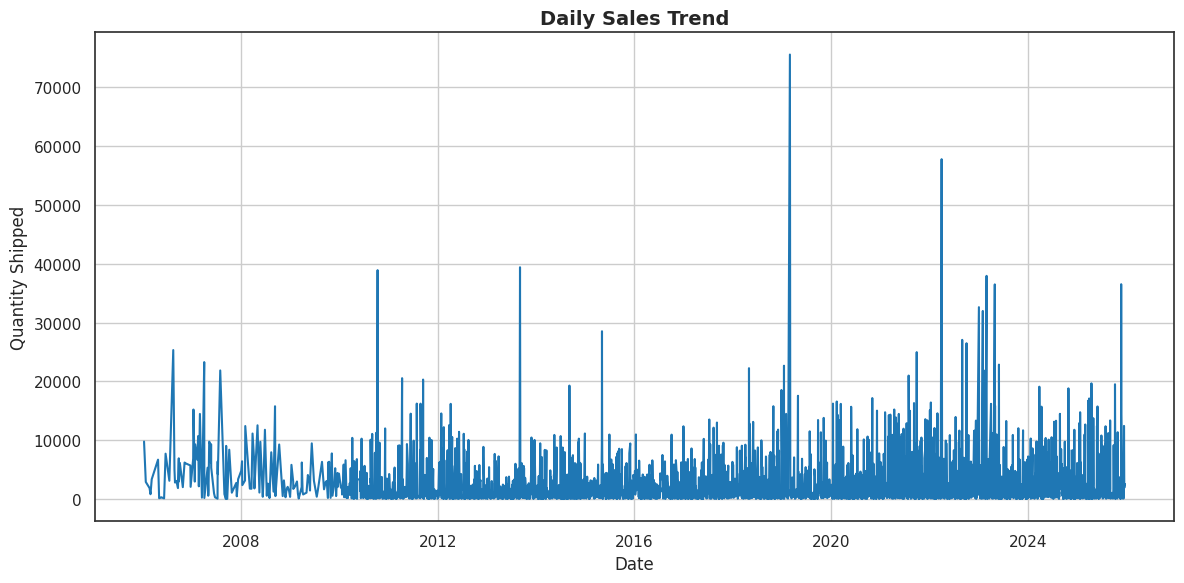

In [60]:
# ------------------------------------------------------------
# STEP 4.4.1 — Daily Sales Trend
# ------------------------------------------------------------
# Why:
# - Shows day-to-day demand behaviour.
# - Helps identify spikes, dips, and anomalies.
# ------------------------------------------------------------

sales_daily["Date"] = pd.to_datetime(sales_daily["Date"])

daily_sales = sales_daily.groupby("Date")["QtyShipped"].sum()

plt.plot(daily_sales.index, daily_sales.values, color=primary)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Quantity Shipped")
plt.tight_layout()
plt.show()


# **4.4.2 — Monthly Sales Trend**

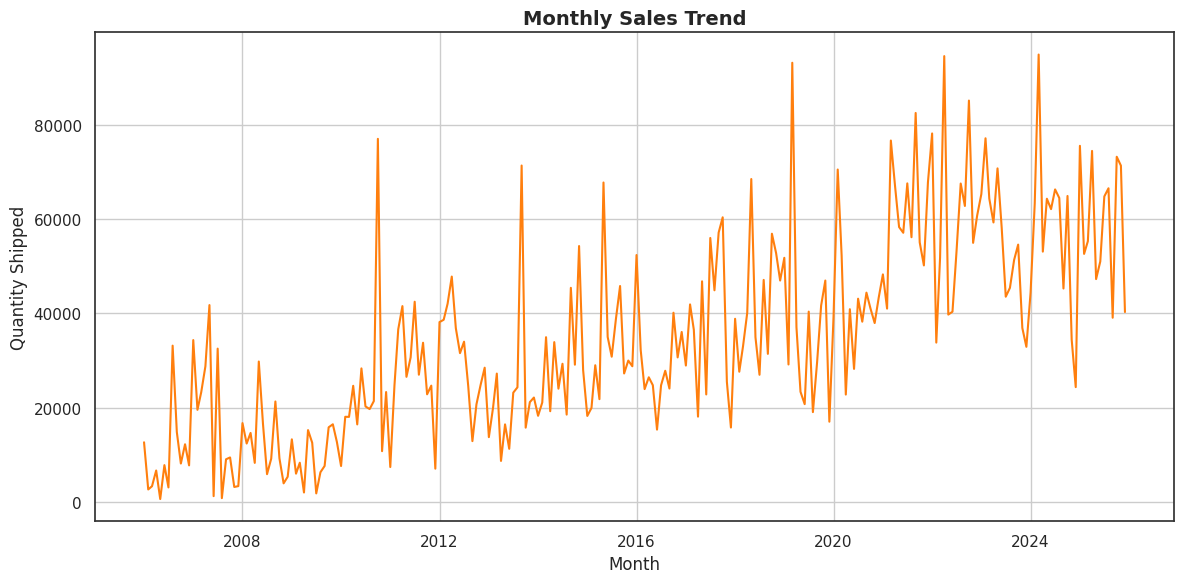

In [61]:
# ------------------------------------------------------------
# STEP 4.4.2 — Monthly Sales Trend
# ------------------------------------------------------------
# Why:
# - Aggregates demand to a higher level for clearer patterns.
# - Useful for identifying seasonality and long‑term trends.
# - Helps validate forecasting assumptions.
# ------------------------------------------------------------

sales_daily["Month"] = sales_daily["Date"].dt.to_period("M")
monthly_sales = sales_daily.groupby("Month")["QtyShipped"].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.plot(monthly_sales.index, monthly_sales.values, color=secondary)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Shipped")
plt.tight_layout()
plt.show()


# **4.4.3 Yearly Trend**

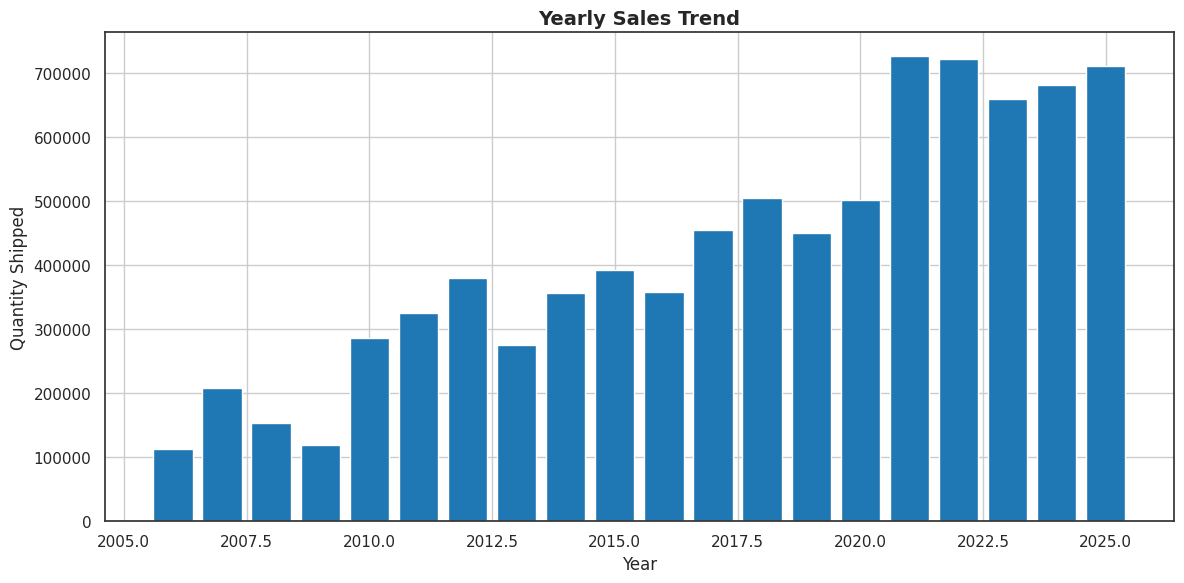

In [62]:
# ------------------------------------------------------------
# STEP 4.4.3 — Yearly Sales Trend
# ------------------------------------------------------------
# Why:
# - Provides a high‑level view of annual demand.
# - Useful for understanding business growth or decline.
# - Helps validate long‑term forecasting direction.
# ------------------------------------------------------------

sales_daily["Year"] = sales_daily["Date"].dt.year
yearly_sales = sales_daily.groupby("Year")["QtyShipped"].sum()

plt.bar(yearly_sales.index, yearly_sales.values, color=primary)
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Quantity Shipped")
plt.tight_layout()
plt.show()


# **4.5 Fast and Slow Movers**

In [63]:
# ------------------------------------------------------------
# STEP 4.5 — Fast and Slow Movers
# ------------------------------------------------------------
# Why:
# - Identifies high‑impact SKUs (fast movers).
# - Highlights low‑activity SKUs (slow movers).
# - Helps determine which products are suitable for forecasting.
# ------------------------------------------------------------

product_stats = (
    sales_daily.groupby("ProdCode")
    .agg(
        total_qty=("QtyShipped", "sum"),
        active_days=("QtyShipped", "count"),
        avg_daily=("QtyShipped", "mean")
    )
    .sort_values("total_qty", ascending=False)
)

display(product_stats.head(10))


,total_qty,active_days,avg_daily
ProdCode,,,
0.490330WR,706868.6400,89,7942.344270
0.218400WR,639626.0000,157,4074.050955
0.218625WR,490666.6300,151,3249.447881
0.218C276WR,489694.0000,229,2138.401747
0.218600WR,385242.0000,105,3668.971429
0.21882WR,256151.9100,73,3508.930274
0.218200WR,226698.4800,72,3148.590000
0.218718WR,194283.0000,124,1566.798387
1.500400RB,151565.3065,428,354.124548


# **4.6 Sales by Product Group**

/tmp/ipython-input-1603451989.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


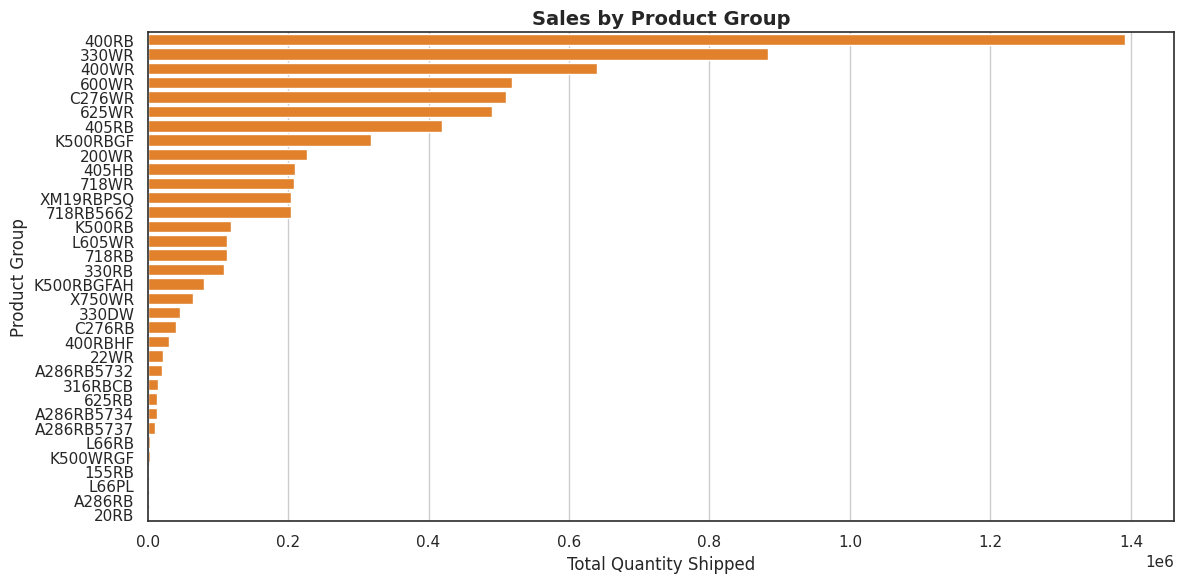

In [64]:
# ------------------------------------------------------------
# STEP 4.6 — Sales by Product Group
# ------------------------------------------------------------
# Why:
# - Shows which product categories drive demand.
# - Helps identify high‑value groups for forecasting.
# - Useful for category‑level inventory planning.
# ------------------------------------------------------------

sales_pg = sales_daily.merge(products_df[["ProdCode", "ProductGroup"]], on="ProdCode", how="left")
group_sales = sales_pg.groupby("ProductGroup")["QtyShipped"].sum().sort_values(ascending=False)

sns.barplot(
    x=group_sales.values,
    y=group_sales.index,
    palette=[secondary] * len(group_sales)
)

plt.title("Sales by Product Group")
plt.xlabel("Total Quantity Shipped")
plt.ylabel("Product Group")
plt.tight_layout()
plt.show()


# **4.7 Receiving vs Sales**

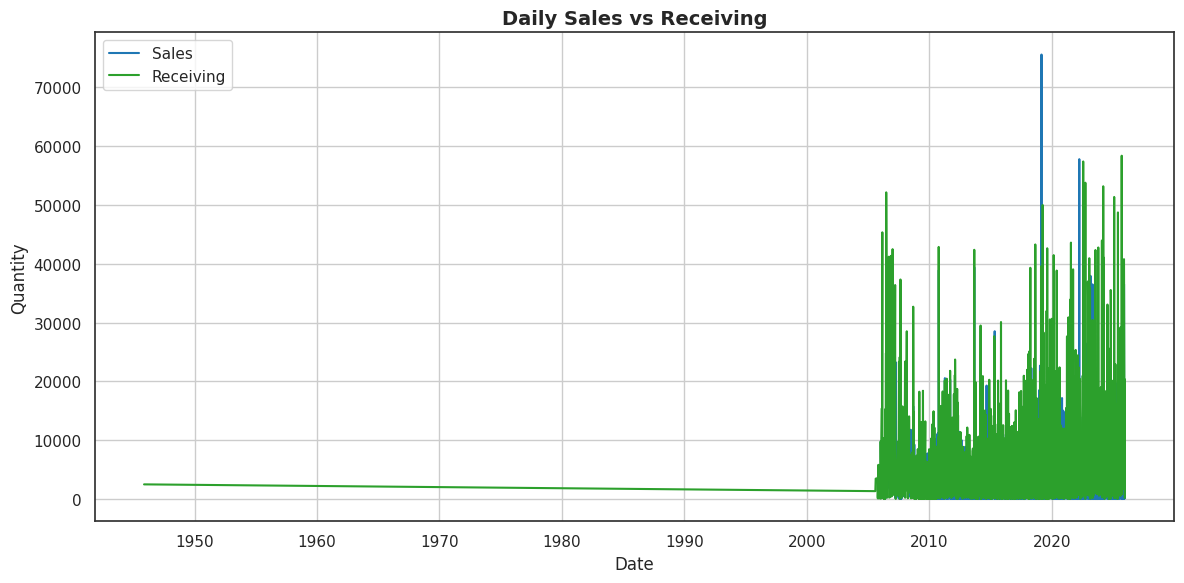

In [68]:
# ------------------------------------------------------------
# STEP 4.7 — Receiving vs Sales Comparison
# ------------------------------------------------------------
# Why:
# - Compares inbound (receiving) vs outbound (sales) flow.
# - Highlights imbalance periods (overstock or stockout risk).
# - Essential for supply chain health assessment.
# ------------------------------------------------------------

# Ensure date column is datetime
receiving_daily["Date"] = pd.to_datetime(receiving_daily["Date"])

# Group receiving by date using the correct column: QtyReceived
daily_receiving = receiving_daily.groupby("Date")["QtyReceived"].sum()

# Plot sales vs receiving
plt.plot(daily_sales.index, daily_sales.values, label="Sales", color=primary)
plt.plot(daily_receiving.index, daily_receiving.values, label="Receiving", color=accent)

plt.title("Daily Sales vs Receiving")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.tight_layout()
plt.show()


# **4.8 Outlier Detection**

In [69]:
# ------------------------------------------------------------
# STEP 4.8 — Outlier and Anomaly Detection
# ------------------------------------------------------------
# Why:
# - Outliers represent real business events (bulk orders, peaks).
# - We do NOT remove them; we teach the model these events.
# - Statistical detection helps understand demand behaviour.
# ------------------------------------------------------------

Q1 = sales_daily["QtyShipped"].quantile(0.25)
Q3 = sales_daily["QtyShipped"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sales_daily[
    (sales_daily["QtyShipped"] < lower_bound) |
    (sales_daily["QtyShipped"] > upper_bound)
]

print(f"Outliers detected: {outliers.shape[0]}")
display(outliers.head())


Outliers detected: 1518


,ProdCode,Date,QtyShipped,Month,Year
1,0.080330DW,2021-02-05,2008.0,2021-02,2021
2,0.080330DW,2022-01-14,2188.0,2022-01,2022
5,0.080330DW,2022-04-18,2263.0,2022-04,2022
7,0.080330DW,2022-12-16,3111.0,2022-12,2022
9,0.080330DW,2023-05-01,2366.0,2023-05,2023


# **4.9 Skewness Analysis**

In [70]:
# ------------------------------------------------------------
# STEP 4.9 — Skewness Analysis
# ------------------------------------------------------------
# Why:
# - Skewness indicates asymmetry in demand distribution.
# - Helps decide if transformations (log, Box‑Cox) are needed.
# - Important for forecasting model stability.
# ------------------------------------------------------------

numeric_cols = ["QtyShipped", "Qty", "Cost"]

for col in numeric_cols:
    for df_name, df in [("Sales", sales_daily), ("Inventory", inventory_df), ("Receiving", receiving_daily)]:
        if col in df.columns:
            skew_val = df[col].skew()
            print(f"{df_name} — {col} skewness: {skew_val:.2f}")


Sales — QtyShipped skewness: 7.52
Inventory — Qty skewness: 3.54
Inventory — Cost skewness: 16.26


# **4.10 Summary of Insights**

In [71]:
# ------------------------------------------------------------
# STEP 4.10 — Summary of EDA Insights
# ------------------------------------------------------------
# Why:
# - Summarises key findings from Module 4.
# - Provides a clear transition into forecasting (Module 5).
# - Ensures business understanding before modeling.
# ------------------------------------------------------------

print("Summary of Insights:")
print("""
- Demand shows clear daily and monthly patterns.
- Several products dominate total volume (fast movers).
- Many products have low activity (slow movers).
- Product groups show uneven contribution to total demand.
- Inventory is concentrated in specific locations.
- Receiving and sales patterns reveal imbalance periods.
- Outliers represent real business events and are retained.
- Skewness indicates the need for transformation in modeling.
""")


Summary of Insights:

- Demand shows clear daily and monthly patterns.
- Several products dominate total volume (fast movers).
- Many products have low activity (slow movers).
- Product groups show uneven contribution to total demand.
- Inventory is concentrated in specific locations.
- Receiving and sales patterns reveal imbalance periods.
- Outliers represent real business events and are retained.
- Skewness indicates the need for transformation in modeling.



In [ ]:
# Code: overall monthly sales trend


In [ ]:
# Code: top products by volume


In [ ]:
# Code: velocity classification (fast vs slow movers)


In [ ]:
# Code: sales by product group / location / customer


### Key Insights
- Bullet points summarizing findings


## 5. Forecasting Demand

### Approach:
- Prepare time series per product
- Use baseline model (moving average / exponential smoothing)
- Optional: ARIMA / Prophet for selected SKUs
- Evaluate using RMSE, MAE, MAPE


In [ ]:
# Code: prepare time series (monthly)


In [ ]:
# Code: baseline forecasting function


In [ ]:
# Code: evaluate model performance


In [ ]:
# Code: plot historical vs forecast for sample products


## 6. Inventory Optimization

### Metrics:
- Average Daily Demand
- Standard Deviation of Demand
- Safety Stock
- Reorder Point (ROP)
- EOQ (with assumptions)

### Formulas:
Safety Stock = Z × StdDev × √LeadTime  
ROP = (Avg Daily Demand × Lead Time) + Safety Stock  
EOQ = √(2DS / H)


In [ ]:
# Code: compute avg daily demand & std dev


In [ ]:
# Code: compute safety stock


In [ ]:
# Code: compute reorder point (ROP)


In [ ]:
# Code: compute EOQ (optional)



In [ ]:
# Code: final recommendation table


## 7. Dashboard‑Style Visualizations

- Current vs recommended inventory
- Stockout risk items
- Overstocked items
- Forecast charts for key products


In [ ]:
# Code: bar chart – current vs recommended stock


In [ ]:
# Code: table – stockout risk items


In [ ]:
# Code: table – overstocked items


## 8. Final Recommendations

### Business Insights
- Bullet points summarizing key findings

### Operational Recommendations
- Increase stock for…
- Reduce stock for…
- Improve lead time for…

### Limitations
- Data gaps
- Missing cost parameters
- Forecast uncertainty

### Next Steps
- Deploy automated pipeline
- Build Power BI dashboard
- Add external features (seasonality, pricing, etc.)


## 9. Appendix

- Helper functions
- Additional plots
- Data dictionary
